In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.interpolate import interp1d



Define usefull functions for correlation


In [3]:
# Define a function to find continuous positive sections
def find_continuous_positive_sections(x, y,constraint):
    sections = []
    start_idx = None
    for i in range(len(y)):
        if y[i] > constraint and start_idx is None:
            start_idx = i
        elif y[i] <= constraint and start_idx is not None:
            sections.append((x[start_idx:i], y[start_idx:i]))
            start_idx = None
    if start_idx is not None:
        sections.append((x[start_idx:], y[start_idx:]))
    return sections

def find_correlation(sections_y,sections_y_a1):
    correlations = []
    for x_sec_y, y_sec_y in sections_y:
        x_min, x_max = x_sec_y[0], x_sec_y[-1]
        for x_sec_y_a1, y_sec_y_a1 in sections_y_a1:
            if x_sec_y_a1[0] <= x_max and x_sec_y_a1[-1] >= x_min:
                common_x_min = max(x_min, x_sec_y_a1[0])
                common_x_max = min(x_max, x_sec_y_a1[-1])
                common_x = np.linspace(common_x_min, common_x_max, num=50)  # 50 points for the correlation
                interp_y = interp1d(x_sec_y, y_sec_y, kind='linear', fill_value="extrapolate")(common_x)
                interp_y_a1 = interp1d(x_sec_y_a1, y_sec_y_a1, kind='linear', fill_value="extrapolate")(common_x)
                corr, _ = pearsonr(interp_y, interp_y_a1)
                correlations.append(corr)
    return correlations

def generate_correlated_plot(x, y, x2, y_a1,func_form, sections_y, sections_y_a1):
    # Generate the plot for the correlated sections
    plt.figure(figsize=(14, 7))

    # Plot the original functions
    plt.plot(x, y)
    plt.plot(x2, y_a1, label=func_form, linestyle='--')

    corr = find_correlation(sections_y,sections_y_a1)

    # We interpolate and correlate only if we have matching sections
    for x_sec_y, y_sec_y in sections_y:
        # Find the x range for the current y section
        x_min, x_max = x_sec_y[0], x_sec_y[-1]

        # For each y_a1 section, check if the x range overlaps with the current y section
        for x_sec_y_a1, y_sec_y_a1 in sections_y_a1:
            if x_sec_y_a1[0] <= x_max and x_sec_y_a1[-1] >= x_min:
                # The sections overlap, find the common range
                common_x_min = max(x_min, x_sec_y_a1[0])
                common_x_max = min(x_max, x_sec_y_a1[-1])

                # Interpolate both sections to a common x range for comparison
                common_x = np.linspace(common_x_min, common_x_max, num=100)  # 50 points for the correlation
                interp_y = interp1d(x_sec_y, y_sec_y, kind='linear', fill_value="extrapolate")(common_x)
                interp_y_a1 = interp1d(x_sec_y_a1, y_sec_y_a1, kind='linear', fill_value="extrapolate")(common_x)

                # Plot the interpolated, correlated sections
                plt.plot(common_x, interp_y, label='Interpolated y (Correlated Section)', linewidth=2, marker='o')
                plt.plot(common_x, interp_y_a1, label='Interpolated {func_form} (Correlated Section)'.format(func_form=func_form), linewidth=2, marker='x')

    # Decorate the plot
    plt.xlabel('x')
    plt.ylabel('y and {func_form}'.format(func_form=func_form))
    plt.title('Plot of the Functions and their Correlated Positive Sections')
    plt.annotate('Correlation: {corr}'.format(corr = corr[0]), xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, ha='left', va='top')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()





Define the functions that we are going to correlate

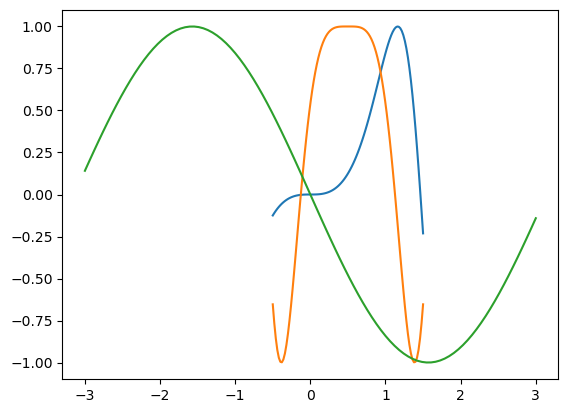

In [4]:
x1 = np.linspace(-0.5, 1.5, 100)
x2 = np.linspace(-2, 2, 100)
x3 = np.linspace(-3, 3, 100)

y_true = np.sin(x1**3) + np.cos(x2**2) - np.sin(x3)

y_1 = np.sin(x1**3)
y_2 = np.cos(x2**2)
y_3 = -np.sin(x3)

plt.plot(x1, y_1, label='sin(x^3)')
plt.plot(x1, y_2, label='cos(x^2)')
plt.plot(x3, y_3, label='-sin(x)')


In [5]:
# x = np.linspace(-1.5, 1.5, 100)
# y = np.sin(x**3) + np.cos(x**2) - np.sin(x)

# x1 = np.linspace(-0, 1.5, 100)
# y_a1 = np.sin(x1**3)

# x2 = np.linspace(-2, 2, 100)
# y_a2 = np.cos(x2**2)

# x3 = np.linspace(-1.5, 1.5, 100)
# y_a3 = -np.sin(x3)

# # y = np.sin(x1**3) + np.cos(x2**2) - np.sin(x3)


Find the continuous positive sections


In [ ]:
#for the global function
sections_y = find_continuous_positive_sections(x, y,-np.inf)


sections_y_a1 = find_continuous_positive_sections(x2, y_a1,-np.inf)

#for agent 2
sections_y_a2 = find_continuous_positive_sections(x2, y_a2,-np.inf)

#for agent 3
sections_y_a3 = find_continuous_positive_sections(x2, y_a3,-np.inf)


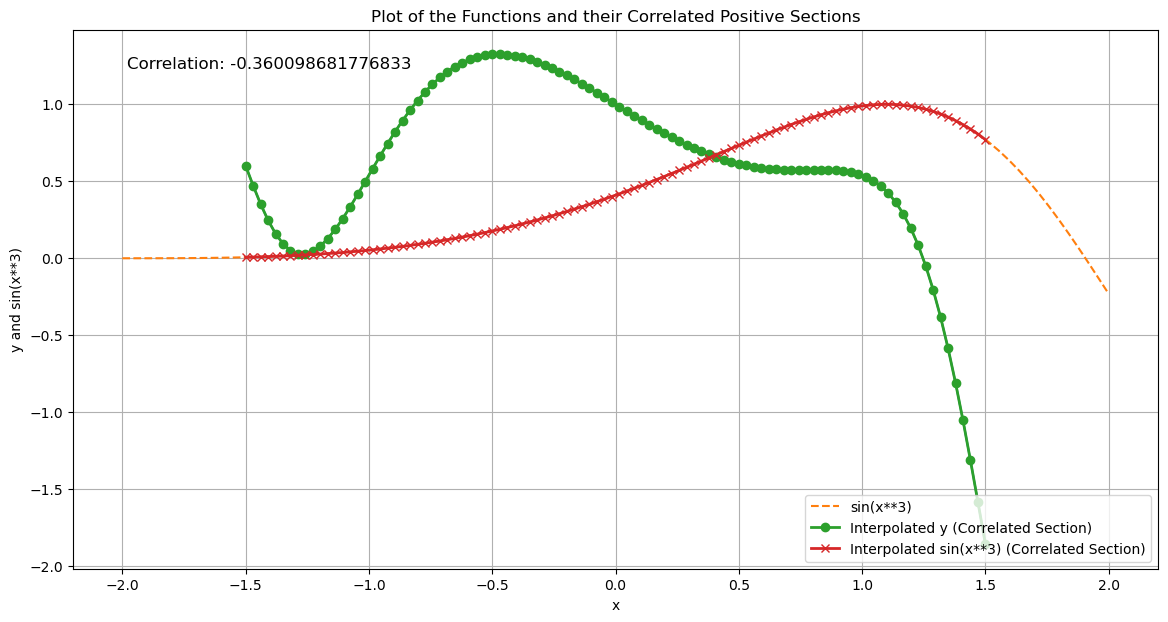

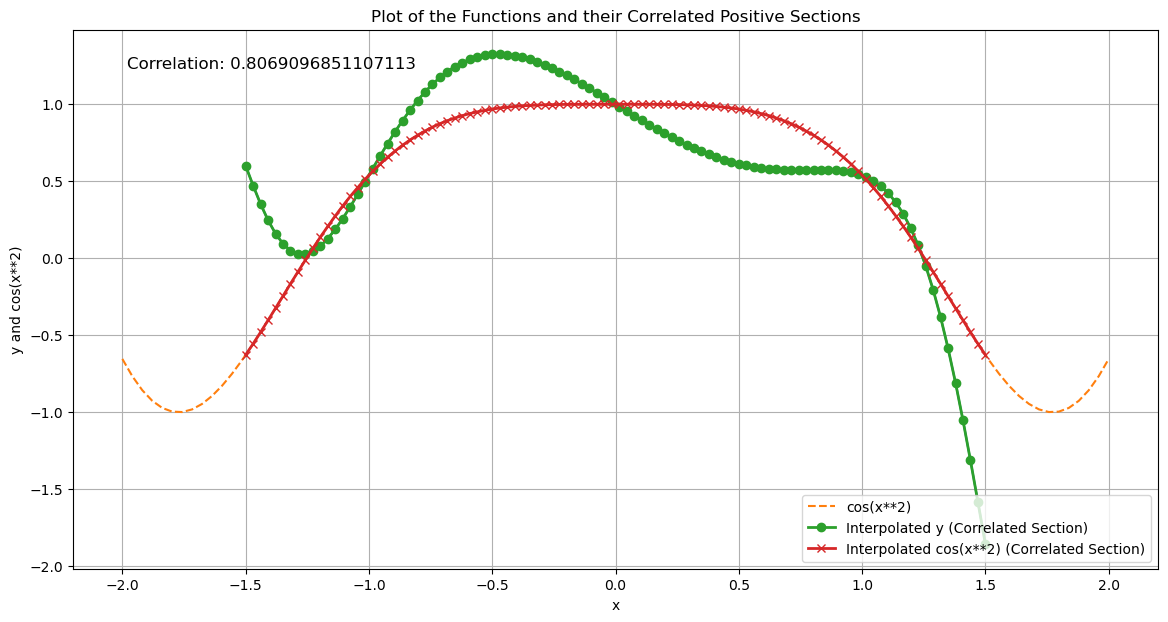

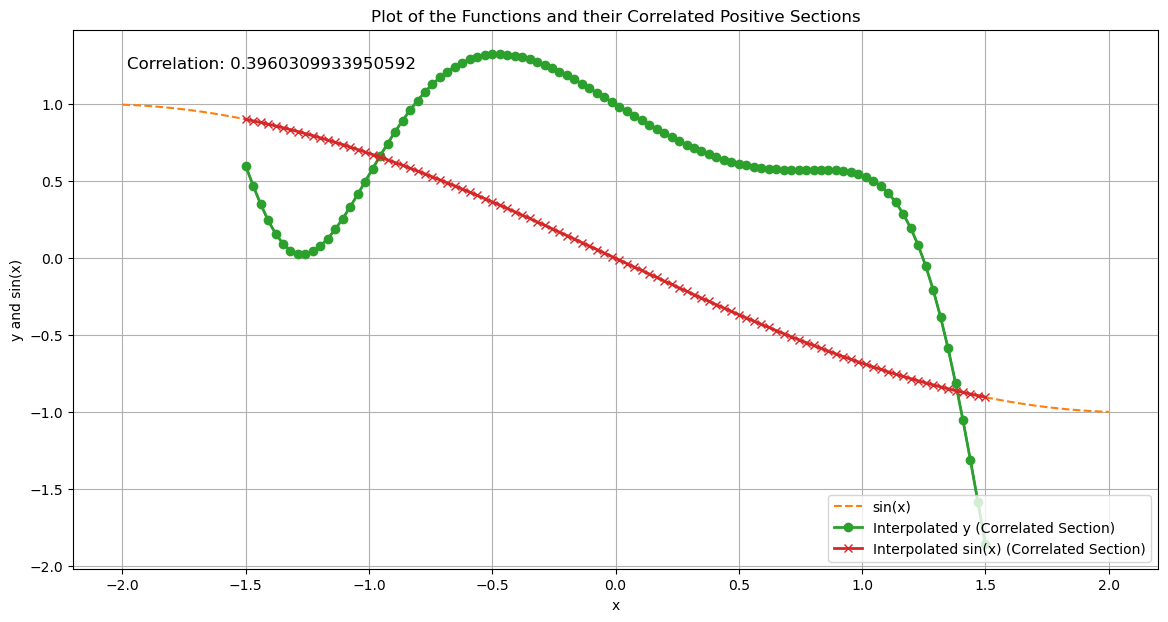

In [ ]:
generate_correlated_plot(x, y, x2, y_a1,"sin(x**3)", sections_y, sections_y_a1)
generate_correlated_plot(x, y, x2, y_a2,"cos(x**2)", sections_y, sections_y_a2)
generate_correlated_plot(x, y, x2, y_a3,"sin(x)", sections_y, sections_y_a3)

In [ ]:
corr = find_correlation(sections_y,sections_y_a1)
print("Correlation between y and sin(x**3): {:.2f}".format(np.mean(corr)))

corr = find_correlation(sections_y,sections_y_a2)
print("Correlation between y and cos(x**2): {:.2f}".format(np.mean(corr)))

corr = find_correlation(sections_y,sections_y_a3)
print("Correlation between y and sin(x): {:.2f}".format(np.mean(corr)))

Correlation between y and sin(x**3): -0.36
Correlation between y and cos(x**2): 0.81
Correlation between y and sin(x): 0.40
